<a href="https://colab.research.google.com/github/AlexBugalter/Lesson/blob/main/how_to_calculate_moving_average_simple_average_in_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка нашего набора данных

In [ ]:
import pandas as pd

prices = [62, 64, 63, 69, 71, 73, 74, 76, 75, 74, 72, 86, 98, 85, 103, 92, 93, 96, 96, 75, 84, 91, 71, 108, 106, 106, 115, 116, 122, 108, 101, 125, 119, 107, 123, 109, 163, 149, 99, 137, 110, 187, 116, 123, 144, 119, 176, 155, 179, 179, 123, 133, 200, 193, 136, 167, 131, 179, 200, 192, 138, 164, 210, 174, 257, 180, 173, 221, 204, 187, 283, 198, 223, 218, 198, 168, 279, 187, 261, 210, 221, 201, 257, 160, 312, 169, 239, 277, 148, 236, 255]

dates = pd.date_range('2022-04-01', periods=len(prices))

df = pd.DataFrame(data=zip(dates, prices), columns=['Date', 'Price'])
print(df.head())

        Date  Price
0 2022-04-01     62
1 2022-04-02     64
2 2022-04-03     63
3 2022-04-04     69
4 2022-04-05     71


## Создание скользящего среднего в Pandas

In [ ]:
# Вычисление скользящего среднего с помощью Pandas
df['Rolling'] = df['Price'].rolling(7).mean()

print(df.head(10))

        Date  Price    Rolling
0 2022-04-01     62        NaN
1 2022-04-02     64        NaN
2 2022-04-03     63        NaN
3 2022-04-04     69        NaN
4 2022-04-05     71        NaN
5 2022-04-06     73        NaN
6 2022-04-07     74  68.000000
7 2022-04-08     76  70.000000
8 2022-04-09     75  71.571429
9 2022-04-10     74  73.142857


## Визуализация скользящей средней в Pandas

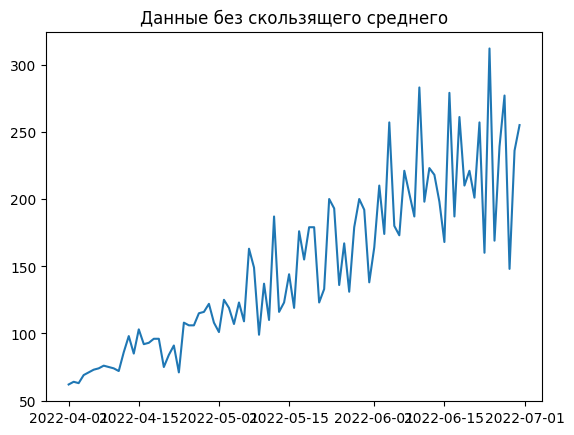

In [ ]:
# Визуализация данных без скользящих средних
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Price'])
plt.title('Данные без скользящего среднего')

plt.show()

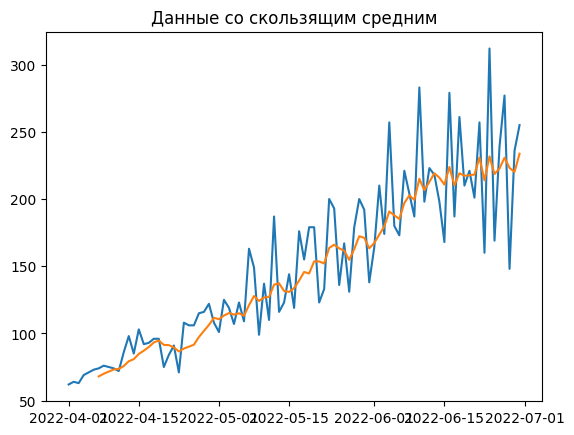

In [ ]:
# Построение графика с учетом эффекта скользящего среднего
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Price'])
plt.plot(df['Date'], df['Rolling'])
plt.title('Данные со скользящим средним')

plt.show()

## Изменение центра скользящего среднего в Pandas

In [ ]:
# Модификация центра окна
df = pd.DataFrame(data=zip(dates, prices), columns=['Date', 'Price'])
df['Rolling'] = df['Price'].rolling(7).mean()

df['Rolling Center'] = df['Price'].rolling(7, center=True).mean()

print(df.head(10))

        Date  Price    Rolling  Rolling Center
0 2022-04-01     62        NaN             NaN
1 2022-04-02     64        NaN             NaN
2 2022-04-03     63        NaN             NaN
3 2022-04-04     69        NaN       68.000000
4 2022-04-05     71        NaN       70.000000
5 2022-04-06     73        NaN       71.571429
6 2022-04-07     74  68.000000       73.142857
7 2022-04-08     76  70.000000       73.571429
8 2022-04-09     75  71.571429       75.714286
9 2022-04-10     74  73.142857       79.285714


## Понимание параметра min_ periods в скользящем среднем Pandas

In [ ]:
# Изменение минимального количества периодов
import pandas as pd

prices = [62, 64, 63, 69, 71, 73, 74, 76, 75, 74, 72, 86, 98, 85, 103, 92, 93, 96, 96, 75, 84, 91, 71, 108, 106, 106, 115, 116, 122, 108, 101, 125, 119, 107, 123, 109, 163, 149, 99, 137, 110, 187, 116, 123, 144, 119, 176, 155, 179, 179, 123, 133, 200, 193, 136, 167, 131, 179, 200, 192, 138, 164, 210, 174, 257, 180, 173, 221, 204, 187, 283, 198, 223, 218, 198, 168, 279, 187, 261, 210, 221, 201, 257, 160, 312, 169, 239, 277, 148, 236, 255]

dates = pd.date_range('2022-04-01', periods=len(prices))
df = pd.DataFrame(data=zip(dates, prices), columns=['Date', 'Price'])

df['With Min Periods'] = df['Price'].rolling(window=4, min_periods=2).mean()
print(df.head())

        Date  Price  With Min Periods
0 2022-04-01     62               NaN
1 2022-04-02     64             63.00
2 2022-04-03     63             63.00
3 2022-04-04     69             64.50
4 2022-04-05     71             66.75


## Вычисление скользящего среднего с помощью объекта GroupBy в Pandas

In [ ]:
# Добавление группы в наш DataFrame
import pandas as pd

data = {
    'date': pd.date_range(start='1/1/2021', periods=15),
    'value': [1, 4, 6, 4, 5, 3, 6, 8, 10, 7, 6, 4, 2, 1, 3],
    'group': ['A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B']
}

df = pd.DataFrame(data)

In [ ]:
# Вычисление скользящего среднего по группам
df['Avg'] = df.groupby('group')['value'].transform(lambda x: x.rolling(3, 3).mean())
print(df.head(7))

        date  value group       Avg
0 2021-01-01      1     A       NaN
1 2021-01-02      4     A       NaN
2 2021-01-03      6     B       NaN
3 2021-01-04      4     B       NaN
4 2021-01-05      5     A  3.333333
5 2021-01-06      3     A  4.000000
6 2021-01-07      6     B  5.333333


## Вычислить скользящее среднее в Pandas с подсчетом шагов

In [ ]:
prices = [62, 64, 63, 69, 71, 73, 74, 76, 75, 74, 72, 86, 98, 85, 103, 92, 93, 96, 96, 75, 84, 91, 71, 108, 106, 106, 115, 116, 122, 108, 101, 125, 119, 107, 123, 109, 163, 149, 99, 137, 110, 187, 116, 123, 144, 119, 176, 155, 179, 179, 123, 133, 200, 193, 136, 167, 131, 179, 200, 192, 138, 164, 210, 174, 257, 180, 173, 221, 204, 187, 283, 198, 223, 218, 198, 168, 279, 187, 261, 210, 221, 201, 257, 160, 312, 169, 239, 277, 148, 236, 255]

dates = pd.date_range('2022-04-01', periods=len(prices))
df = pd.DataFrame(data=zip(dates, prices), columns=['Date', 'Price'])
df['Stepped Rolling'] = df['Price'].rolling(3, step=3).mean()
print(df.head(7))

        Date  Price  Stepped Rolling
0 2022-04-01     62              NaN
1 2022-04-02     64              NaN
2 2022-04-03     63              NaN
3 2022-04-04     69        65.333333
4 2022-04-05     71              NaN
5 2022-04-06     73              NaN
6 2022-04-07     74        72.666667
